# 1. 训练集和测试集的产生

## 数据导入

In [281]:
import numpy as np

#PV_w1=np.loadtxt('D:/杭电与人工智能研究院/光伏教仪/人工智能课程案例/课程实验课件/机器学习课程实验一___贝叶斯估计/课程实验程序/数据/Normal_data.txt')

Training_Data=np.loadtxt('D:/杭电与人工智能研究院/光伏教仪/人工智能课程案例/课程实验课件/机器学习课程实验一___贝叶斯估计/课程实\
验程序/数据/Training_Data.txt')
Training_Data.shape

(800, 3)

# 2. 随机抽取数据作为训练数据与测试数据

In [271]:
# Training_Data 800*3  400组正常运行数据  400组阴影遮挡数据 
#训练数据与测试数据比例4：1
m,n=Training_Data.shape

#在各组中随机地抽取Num_train个训练样本
Num_train=int(m//2*0.8)
temp_w1=np.random.permutation(m//2)
temp_w2=400+np.random.permutation(m//2)

#训练集w1和w2各Num_train个样本
Data_Train_W1=Training_Data[temp_w1[0:Num_train],0:2]
Data_Train_W2=Training_Data[temp_w2[0:Num_train],0:2]

#测试集w1和w2各m//2-Num_train个样本
Data_Test_W1=Training_Data[temp_w1[Num_train:m//2],0:2]
Data_Test_W2=Training_Data[temp_w2[Num_train:m//2],0:2]

print(Data_Train_W1.shape)
print(Data_Train_W2.shape)
print(Data_Test_W1.shape)
print(Data_Test_W2.shape)

(320, 2)
(320, 2)
(80, 2)
(80, 2)


# 3. 分类器的训练

In [272]:
#计算两类训练数据的均值向量
avr_w1=np.mean(Data_Train_W1,axis=0)  #按列求均值
avr_w2=np.mean(Data_Train_W2,axis=0)  #按列求均值


## 计算两类训练数据的协方差

In [273]:
#计算w1类的协方差矩阵
dim0_w1=Data_Train_W1[:,0]
dim1_w1=Data_Train_W1[:,1]

var_01_w1=sum((dim0_w1 - avr_w1[0]) * (dim1_w1 - avr_w1[1])) / (len(Data_Train_W1) - 1)

avr_dim0_w1=np.var(dim0_w1)
avr_dim1_w1=np.var(dim1_w1)

cov_w1=[[avr_dim0, var_01_w1],[var_01,avr_dim1_w1]]

#计算w2类的协方差矩阵
dim0_w2=Data_Train_W2[:,0]
dim1_w2=Data_Train_W2[:,1]

var_01_w2=sum((dim0_w2 - avr_w2[0]) * (dim1_w2 - avr_w2[1])) / (len(Data_Train_W2) - 1)

avr_dim0_w2=np.var(dim0_w2)
avr_dim1_w2=np.var(dim1_w2)

cov_w2=[[avr_dim0_w2, var_01_w2],[var_01_w2 ,avr_dim1_w2 ]]

#转换为矩阵形式
cov_w1=np.mat(cov_w1)
cov_w2=np.mat(cov_w2)

# 4. 测试模型

In [275]:

import math as m
#先验概率
P_w1=1/2;
P_w2=1/2;
#合并数据集
Data_Test=np.vstack((Data_Test_W1,Data_Test_W2))
correct_w1=[0,0]
correct_w2=[0,0]
error_w1=[0,0]
error_w2=[0,0]

avr_w1=np.mat(avr_w1)
avr_w2=np.mat(avr_w2)
data_test=np.mat(Data_Test)

for i in range(0,160):
    #导入测试数据
    x=Data_Test[i,:]
    #计算测试向量的判决函数
    J1=float(-0.5*(x-avr_w1)*cov_w1.I*(x-avr_w1).T+m.log(P_w1)-0.5*m.log(np.linalg.det(cov_w1)))
    J2=float(-0.5*(x-avr_w2)*cov_w2.I*(x-avr_w2).T+m.log(P_w2)-0.5*m.log(np.linalg.det(cov_w2)))
    #print(J1)
    #print(J2)
    #分类
    #类w1测试样本归为类w1
    if (i<80 and J1 >= J2):
        correct_w1=np.vstack((correct_w1,Data_Test[i,:]))
    #类w2测试样本归为类w2
    elif i>=80 and J1 < J2:
        correct_w2=np.vstack((correct_w2,Data_Test[i,:]))
    #类w1测试样本误判为类w2
    elif (i<80 and J1 < J2):
        error_w1=np.vstack((error_w1,Data_Test[i,:]))
    #类w2测试样本误判为类w1
    elif (i>=80 and J1 >= J2):
        error_w2=np.vstack((error_w2,Data_Test[i,:]))

##计算分类的正确率与错误率
Num_correct_w1=len(correct_w1)-1
Num_correct_w2=len(correct_w2)-1
Num_error_w1=len(error_w1)-1
Num_error_w2=len(error_w2)-1

error_rate_w1=Num_error_w1/80
error_rate_w2=Num_error_w2/80
correct_rate_w1=1-error_rate_w1
correct_rate_w2=1-error_rate_w2

print('w1正确率: %2.2f%%'%(correct_rate_w1*100))
print('w2正确率: %2.2f%%'%(correct_rate_w2*100))
print('w1误分到w2: %2.2f%%'%(error_rate_w1*100))
print('w2误分到w1: %2.2f%%'%(error_rate_w2*100))



w1正确率: 65.00%
w2正确率: 72.50%
w1误分到w2: 35.00%
w2误分到w1: 27.50%


# 5. 结果可视化

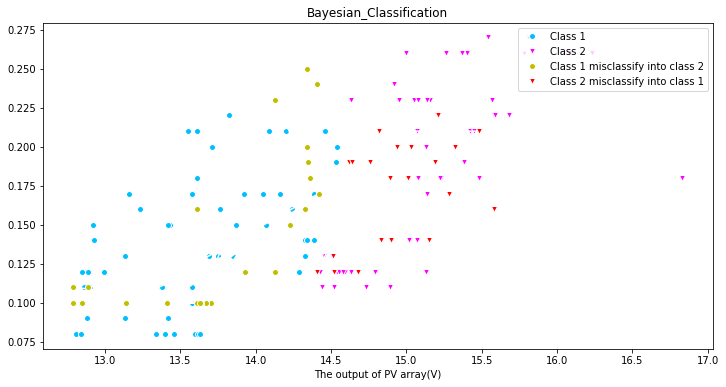

In [279]:
#画图 两分类结果
import matplotlib.pyplot as plt  #Python导入Matplotlib包，专门用于绘图
#显示中文和负号

#plt.rcParams['font.sas-serig']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(12, 6))  # 窗口大小

c1, =plt.plot(correct_w2[1:len(correct_w2),0], correct_w2[1:len(correct_w2),1],'w',markerfacecolor='#00BFFF',\
              marker='o')
c2, =plt.plot(correct_w1[1:len(correct_w1),0], correct_w1[1:len(correct_w1),1],'w',markerfacecolor='#FF00FF', \
              marker='v')
c3, =plt.plot(error_w1[1:len(error_w1),0], error_w1[1:len(error_w1),1],'w',markerfacecolor='y', marker='o')
c4, =plt.plot(error_w2[1:len(error_w2),0], error_w2[1:len(error_w2),1],'w',markerfacecolor='r', marker='v')

plt.xlabel('The output of PV array(V)')
plt.xlabel('The output of PV array(V)')

plt.title('Bayesian_Classification')
plt.legend([c1, c2, c3, c4], ["Class 1", "Class 2",  "Class 1 misclassify into class 2"\
                              ,  "Class 2 misclassify into class 1"], loc=1)

# 显示图形
plt.show()